## Objectives : Review basic inferential statistics
1. Develop graphical intution
2. Review hypothesis testing & confidence intervals
We will be looking at **Gosset** sleep data

In [1]:
#help(sleep) #Data which show the effect of two soporific drugs (increase in hours of sleep compared to control) on 10 patients.

head(sleep)
#A data frame with 20 observations on 3 variables.

#[, 1]	extra	numeric	increase in hours of sleep (extra hours of sleep)
#[, 2]	group	factor	drug given (drug-id)
#[, 3]	ID	factor	patient ID (patient-id)

extra,group,ID
0.7,1,1
-1.6,1,2
-0.2,1,3
-1.2,1,4
-0.1,1,5
3.4,1,6


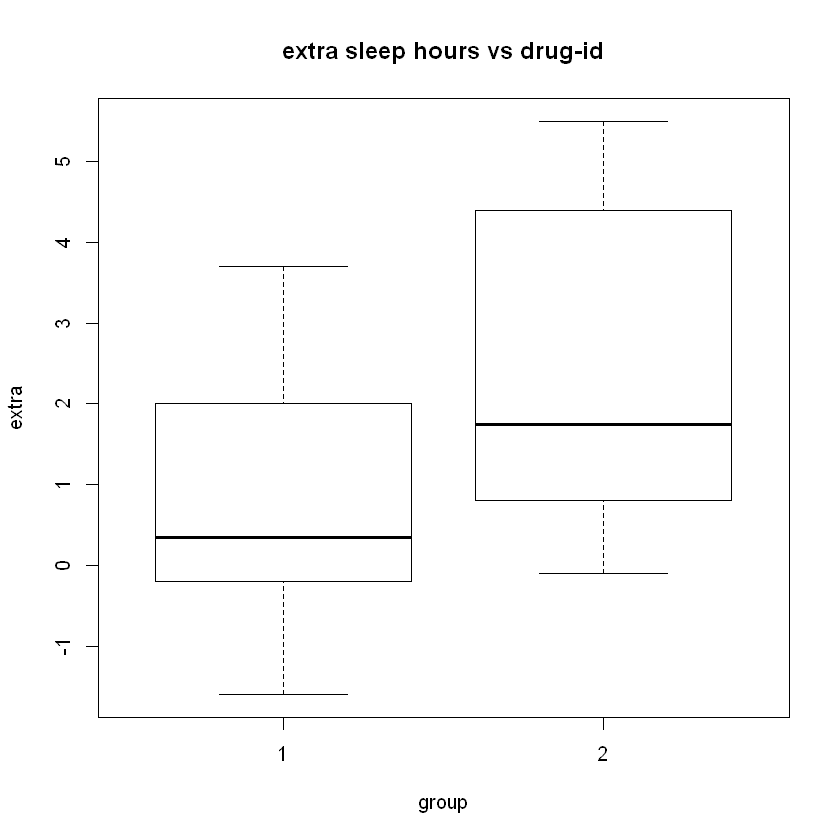

In [2]:
#let's plot the data
plot(extra ~ group, data=sleep,main='extra sleep hours vs drug-id')

#### remember that bold line in above box-plot is median and not mean
#### box represents inter-quartile range (50% of data points)

In [3]:
attach(sleep)
extra.1 = extra[group==1]
extra.2 = extra[group==2]

## Independence (difference) test between two drug effects
### Though it is very obvious from the above box plot that drug-2 is effective compared to drug-2, let's run a hypothesis test to understand the difference

In [4]:
#Test our hypothesis that two drugs are different
### Hypothesis test of independence
t.test(extra.1,extra.2,paired = T,alternative = 'two.sided')
#null hupothesis is that 'true-difference' is zero (ie, the mean response for both drugs are same)
# t-value is too-off (like almost 4 standard deviations from mean)
# also p-value is too small that we can reject the null-hypothesis
# so there is a clear difference between two drugs


	Paired t-test

data:  extra.1 and extra.2
t = -4.0621, df = 9, p-value = 0.002833
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.4598858 -0.7001142
sample estimates:
mean of the differences 
                  -1.58 


### Another way is to look at the confidence intervals and see if it includes zero in its range
-2.4598858 to -0.7001142 does not include zero - so our null hypothesis is not true

### let's unpack the above output !
    1. null hypothesis H_0 : mean response is same for both drugs
                    H_0 = mu(drug1)-mu(drug2)=0
    2. alternative hypothesis H_1 : mean response is different for both drugs
                    H_0 = mu(drug1)-mu(drug2) != 0
                   

In [18]:
mean(extra.1-extra.2) 
#Average of differences

[1] -1.58

### alpha (p-value) is the probality of Type I error
The probability that 'when null hypothesis is TRUE and we are rejecting it'

In [32]:
#Let's calculate the t-value
# t-value = [avg(differences of responses of two groups)-nullHypothesisValue]/[sample Standard deviation of differences/sqrt(n)]

dbar <- mean(extra.1-extra.2)
nullHyp <- 0
sd_dbar <- sd(extra.1-extra.2)
tval <- (dbar-nullHyp)/(sd_dbar/sqrt(length(extra.1)))
paste0('t-value is ',tval)


[1] 1.229995

[1] "t-value is -4.06212768338204"

In [27]:
#let's calculate the p-value corresponding to the t-value
pval <- 2*pt(tval,df=length(extra.1)-1) 
paste0('since p-val ',round(pval,4), ' is less than the threshold(.05), we can reject the H0')

[1] "since p-val 0.0028 is less than the threshold(.05), we can reject the H0"

## classic 'paired differences test'

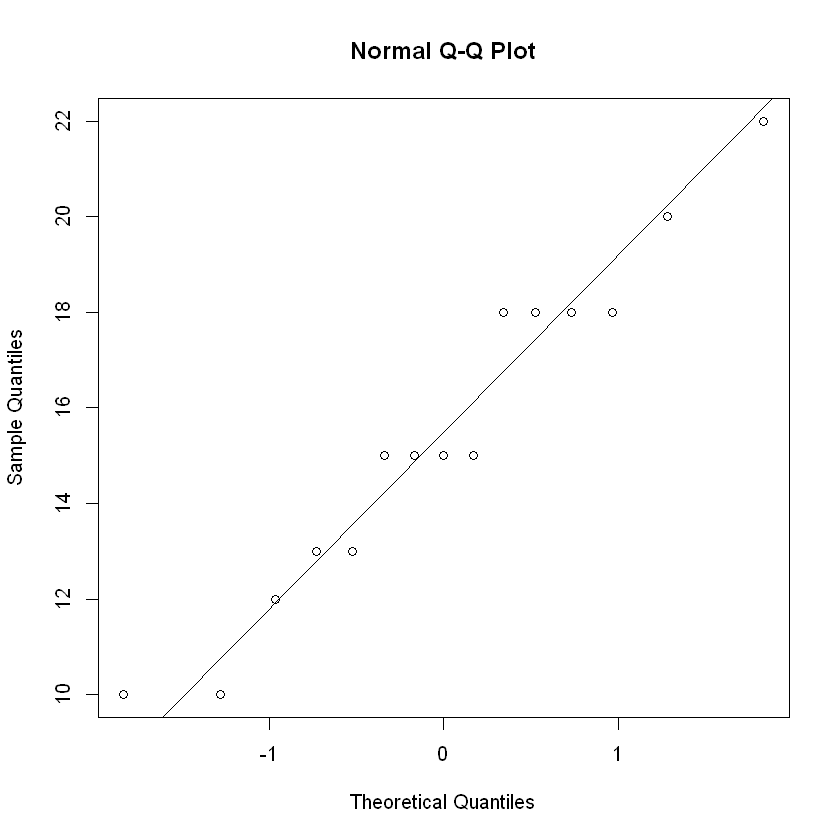

In [28]:
bpm.before = c(64, 45, 51, 56, 76, 77, 48, 65, 88, 37, 49, 71, 63, 57, 43); 
bpm.after = c(82, 63, 64, 71, 91, 99, 66, 85, 100, 52, 59, 84, 73 ,75, 58 ); 
qqnorm( bpm.after - bpm.before); 
qqline(bpm.after - bpm.before)

In [29]:
### Hypothesis test of independence
t.test(bpm.before,bpm.after,paired = T,alternative = 'two.sided')


	Paired t-test

data:  bpm.before and bpm.after
t = -17.005, df = 14, p-value = 9.579e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -17.41748 -13.51585
sample estimates:
mean of the differences 
              -15.46667 


## General framework for Hypothesis testing
    1. define the test statistic (such as Z,t,Chi-Squarred and F)
    2. calculate the p-value associated with the test-statistic
    3. if p-val < alpha reject H0 else failed to reject H0


### How is confidence interval computed 
    * Confidence interval is a function of 'Estimate, t-value for the alpha/2, standard error'
*******************************************************************************************************
                    confidence_interval = Estimate +/- t(alpha/2) + standard_error
                    standard_error = standard deviation/sqrt(n)
*******************************************************************************************************

In [45]:
c_interval_ub <- dbar + (qt(.975,9) * (sd(extra.1-extra.2)/sqrt(length(extra.1)) ))
c_interval_lb <- dbar - (qt(.975,9) * (sd(extra.1-extra.2)/sqrt(length(extra.1)) ))
paste0(c_interval_lb,' to ', c_interval_ub)

[1] "-2.45988576327698 to -0.700114236723018"

### Recall that 'Standard Error is the Standard deviation of the sampling distribution'